In [1]:
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
import requests
from pprint import pprint
from config import api_key 
#create config.py file with your key, and add a .gitignore file with the name of the credential 
#file (i.e. config.py) so that your key isn't exposed to the world on GitHub if pushing there.
#def search_grocers(set_num): 
# This function launches the request for all grocery location endpoints in San Francisco, CA.

    #url = 'https://api.yelp.com/v3/businesses/search'
    #headers = {
        #'Authorization': 'Bearer {}'.format(api_key),
    #}
    #url_params = { #parameters passed to the API
    #"categories": 'restaurants, All',
    #"location":"Raleigh",
    #"state": "North Carolina",
    #'offset': offset_num, # We are going to iterate the offset
     #"limit":50 # Maximum return of results per request (ref: API documentation).
     #}

    #response = requests.get(url, headers=headers, params=url_params)
    #return response.json() # Returns a JSON.


#if __name__ == "__main__":
    #for offset_num in np.arange(50,550,50) : 
# I want up to 550 results, in steps of 50 results per request.
        #try:
            #output_json = search_grocers(offset_num) # Executing the function defined above.
            #print(offset_num) # Making sure each offset iteration is running
            #print(output_json) # If you wanna check the JSON for each iteration
            #if offset_num == 50:
               # df_first = pd.DataFrame.from_dict(output_json['businesses'])
# 'businesses' because that's the primary key of the JSON (i.e. pull all attribute data by calling 
# that one key). This is something you can figure out reading the API documentation or visually
# parsing the JSON. 
            #else:
                #df2 = pd.DataFrame.from_dict(output_json['businesses'])
                #df_first = df_first.append(df2)
# The conditional statement above is so that I can append my results into a single dataframe, to 
# save into a single csv document.
        #except AttributeError:
            #print("error at ", offset_num) # Helpful for debugging purposes
            
    #df_first.to_csv("raleigh_restaurant_output_data.csv", index = False)
#pprint (output_json)

In [2]:
asheville_food = "Resources/asheville_restaurant_output_data.csv"

# Read and display the CSV with Pandas
asheville_food_pd = pd.read_csv(asheville_food)
asheville_food_pd.head()


,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,bull-and-beggar-asheville,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...","{'latitude': 35.5865014297322, 'longitude': -8...",(828) 575-9443,1051.002692,Hbq8phpGo9cWXAROKlVXcA,https://s3-media2.fl.yelpcdn.com/bphoto/kM1tjG...,False,"{'address1': '37 Paynes Way', 'address2': 'Ste...",Bull And Beggar,1.828576e+10,$$$,4.0,226,[],https://www.yelp.com/biz/bull-and-beggar-ashev...
1,tupelo-honey-asheville-2,"[{'alias': 'breakfast_brunch', 'title': 'Break...","{'latitude': 35.5030404957341, 'longitude': -8...",(828) 505-7676,9311.927042,ewIMvdSDrUOdqNOPhRJVLQ,https://s3-media3.fl.yelpcdn.com/bphoto/YMirzy...,False,"{'address1': '1829 Hendersonville Rd', 'addres...",Tupelo Honey,1.828506e+10,$$,4.0,508,[],https://www.yelp.com/biz/tupelo-honey-ashevill...
2,well-bred-bakery-and-cafe-asheville,"[{'alias': 'cafes', 'title': 'Cafes'}, {'alias...","{'latitude': 35.566257067378, 'longitude': -82...",(828) 774-5307,2280.007479,RQnT2ci2whqwWcik_8Yg-A,https://s3-media4.fl.yelpcdn.com/bphoto/tK8Erp...,False,"{'address1': '6 Boston Way', 'address2': '', '...",Well-Bred Bakery & Cafe,1.828775e+10,$,4.5,200,[],https://www.yelp.com/biz/well-bred-bakery-and-...
3,chiesa-asheville,"[{'alias': 'italian', 'title': 'Italian'}]","{'latitude': 35.6004486, 'longitude': -82.5631...",(828) 552-3110,2040.816336,zU-uzCALA7UFT-vrV_QAXw,https://s3-media2.fl.yelpcdn.com/bphoto/s5Fnlz...,False,"{'address1': '152 Montford Ave', 'address2': '...",Chiesa,1.828552e+10,$$,4.5,173,[],https://www.yelp.com/biz/chiesa-asheville?adju...
4,mela-indian-restaurant-asheville,"[{'alias': 'indpak', 'title': 'Indian'}, {'ali...","{'latitude': 35.5972579, 'longitude': -82.553156}",(828) 225-8880,1605.521435,nXdNFbWmik_4bS41cYpbuw,https://s3-media3.fl.yelpcdn.com/bphoto/qEqcRi...,False,"{'address1': '70 N Lexington Ave', 'address2':...",Mela Indian Restaurant,1.828226e+10,$$,4.0,385,[],https://www.yelp.com/biz/mela-indian-restauran...


In [3]:
asheville_food_pd.columns
    

Index(['alias', 'categories', 'coordinates', 'display_phone', 'distance', 'id',
       'image_url', 'is_closed', 'location', 'name', 'phone', 'price',
       'rating', 'review_count', 'transactions', 'url'],
      dtype='object')

In [4]:
asheville_ratings = asheville_food_pd[["name","categories", "price", "rating",
                            "review_count"]]
asheville_ratings.head()


,name,categories,price,rating,review_count
0,Bull And Beggar,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",$$$,4.0,226
1,Tupelo Honey,"[{'alias': 'breakfast_brunch', 'title': 'Break...",$$,4.0,508
2,Well-Bred Bakery & Cafe,"[{'alias': 'cafes', 'title': 'Cafes'}, {'alias...",$,4.5,200
3,Chiesa,"[{'alias': 'italian', 'title': 'Italian'}]",$$,4.5,173
4,Mela Indian Restaurant,"[{'alias': 'indpak', 'title': 'Indian'}, {'ali...",$$,4.0,385


In [5]:
asheville_top_food = asheville_ratings.loc[asheville_ratings["rating"] > 4.5, [
    "name", "categories", "rating","review_count"]]
asheville_top_food.reset_index(inplace=True)
asheville_top_food

,index,name,categories,rating,review_count
0,33,A Taste of El Salvador,"[{'alias': 'salvadoran', 'title': 'Salvadoran'}]",5.0,60
1,49,The Times at S&W,"[{'alias': 'gastropubs', 'title': 'Gastropubs'...",5.0,41
2,68,Tiger Bay,"[{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...",5.0,40
3,76,The Underground Cafe With DoughP Doughnuts,"[{'alias': 'donuts', 'title': 'Donuts'}, {'ali...",5.0,37
4,88,Sand Hill Kitchen,"[{'alias': 'breakfast_brunch', 'title': 'Break...",5.0,42
5,148,Simple Cafe & Juice Bar,"[{'alias': 'juicebars', 'title': 'Juice Bars &...",5.0,18
6,159,Henrietta's Poultry Shoppe,"[{'alias': 'newamerican', 'title': 'American (...",5.0,28
7,202,Cafe Yuzu,"[{'alias': 'desserts', 'title': 'Desserts'}, {...",5.0,10
8,243,Benne On Eagle,"[{'alias': 'southern', 'title': 'Southern'}, {...",5.0,9
9,264,Out of the Blue Peruvian Fusion Cuisine,"[{'alias': 'foodtrucks', 'title': 'Food Trucks...",5.0,7


In [6]:
asheville_most_reviews = asheville_ratings.loc[asheville_ratings["review_count"] > 300, [
    "name", "categories","rating", "review_count"]]
ash_most_rev = asheville_most_reviews.sort_values("review_count", ascending=False)
ash_most_rev.reset_index(inplace=True)
ash_most_rev

,index,name,categories,rating,review_count
0,161,Sierra Nevada Taproom,"[{'alias': 'breweries', 'title': 'Breweries'},...",4.5,851
1,1,Tupelo Honey,"[{'alias': 'breakfast_brunch', 'title': 'Break...",4.0,508
2,4,Mela Indian Restaurant,"[{'alias': 'indpak', 'title': 'Indian'}, {'ali...",4.0,385
3,16,Asheville Pizza & Brewing Company,"[{'alias': 'movietheaters', 'title': 'Cinema'}...",4.0,363
4,15,Green Sage Cafe - Downtown,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",4.0,350
5,7,Mellow Mushroom,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",4.0,329
6,19,Cantina at Historic Biltmore Village,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a...",4.0,301


In [7]:
raleigh_food = "Resources/raleigh_restaurant_output_data.csv"

# Read and display the CSV with Pandas
raleigh_food_pd = pd.read_csv(raleigh_food)
raleigh_food_pd.head()

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,taqueria-el-toro-raleigh,"[{'alias': 'mexican', 'title': 'Mexican'}]","{'latitude': 35.7308158874512, 'longitude': -7...",(919) 661-5676,10282.992574,VPlLLekLBg1UulFi5u0MbQ,https://s3-media4.fl.yelpcdn.com/bphoto/vZCJgm...,False,"{'address1': '3601 Junction Blvd', 'address2':...",Taqueria El Toro,1.919662e+10,$,4.5,247,[],https://www.yelp.com/biz/taqueria-el-toro-rale...
1,mona-pita-raleigh,"[{'alias': 'mediterranean', 'title': 'Mediterr...","{'latitude': 35.8584037, 'longitude': -78.5805...",(919) 431-6500,7467.675339,DdGG2J1tqamBzGnS5ZRauw,https://s3-media2.fl.yelpcdn.com/bphoto/Om5fhi...,False,"{'address1': '5260 Capital Blvd', 'address2': ...",Mona Pita,1.919432e+10,$,4.5,197,"['delivery', 'pickup']",https://www.yelp.com/biz/mona-pita-raleigh?adj...
2,seoul-garden-restaurant-raleigh,"[{'alias': 'korean', 'title': 'Korean'}]","{'latitude': 35.849052806532, 'longitude': -78...",(919) 850-9984,5205.719957,qeabde9RHjUJD0ZUFBV2YA,https://s3-media1.fl.yelpcdn.com/bphoto/ozD4NP...,False,"{'address1': '4701 Atlantic Ave', 'address2': ...",Seoul Garden Restaurant,1.919851e+10,$$,4.0,346,"['delivery', 'pickup']",https://www.yelp.com/biz/seoul-garden-restaura...
3,the-raleigh-times-bar-raleigh-2,"[{'alias': 'newamerican', 'title': 'American (...","{'latitude': 35.7781388809935, 'longitude': -7...",(919) 833-0999,5136.232145,Yr2VHk6OQMA56sdVkdMW6w,https://s3-media3.fl.yelpcdn.com/bphoto/e55p1N...,False,"{'address1': '14 E Hargett St', 'address2': ''...",The Raleigh Times Bar,1.919833e+10,$$,3.5,624,[],https://www.yelp.com/biz/the-raleigh-times-bar...
4,soo-café-raleigh-3,"[{'alias': 'korean', 'title': 'Korean'}, {'ali...","{'latitude': 35.8171559947175, 'longitude': -7...",(919) 876-1969,4994.540141,8FA64RmA-aNJsnepBsTU-A,https://s3-media1.fl.yelpcdn.com/bphoto/5WjqEe...,False,"{'address1': '2815 Brentwood Rd', 'address2': ...",Soo Café,1.919876e+10,$$,4.5,237,[],https://www.yelp.com/biz/soo-caf%C3%A9-raleigh...


In [8]:
raleigh_ratings = raleigh_food_pd[["name","categories", "price", "rating",
                            "review_count"]]
raleigh_ratings.head()


,name,categories,price,rating,review_count
0,Taqueria El Toro,"[{'alias': 'mexican', 'title': 'Mexican'}]",$,4.5,247
1,Mona Pita,"[{'alias': 'mediterranean', 'title': 'Mediterr...",$,4.5,197
2,Seoul Garden Restaurant,"[{'alias': 'korean', 'title': 'Korean'}]",$$,4.0,346
3,The Raleigh Times Bar,"[{'alias': 'newamerican', 'title': 'American (...",$$,3.5,624
4,Soo Café,"[{'alias': 'korean', 'title': 'Korean'}, {'ali...",$$,4.5,237


In [9]:
raleigh_top_food = raleigh_ratings.loc[raleigh_ratings["rating"] > 4.5, [
    "name", "categories", "rating", "review_count"]]
raleigh_top_food.reset_index(inplace=True)
raleigh_top_food

,index,name,categories,rating,review_count
0,79,Carroll's Kitchen,"[{'alias': 'nonprofit', 'title': 'Community Se...",5.0,44
1,213,Saigon Pho,"[{'alias': 'vietnamese', 'title': 'Vietnamese'}]",5.0,26
2,270,Juicekeys,"[{'alias': 'organic_stores', 'title': 'Organic...",5.0,22
3,376,Grandotes Taco Grill,"[{'alias': 'foodtrucks', 'title': 'Food Trucks...",5.0,11
4,419,Al-Aseel,"[{'alias': 'mideastern', 'title': 'Middle East...",5.0,13
5,438,Don Beto El Poblano,"[{'alias': 'foodtrucks', 'title': 'Food Trucks...",5.0,9


In [10]:
raleigh_most_reviews = raleigh_ratings.loc[raleigh_ratings["review_count"] > 300, [
    "name", "categories","rating", "review_count"]]
raleigh_most_rev = raleigh_most_reviews.sort_values("review_count", ascending=False)
raleigh_most_rev.reset_index(inplace=True)
raleigh_most_rev

,index,name,categories,rating,review_count
0,3,The Raleigh Times Bar,"[{'alias': 'newamerican', 'title': 'American (...",3.5,624
1,7,Lilly's Pizza,"[{'alias': 'pizza', 'title': 'Pizza'}]",3.5,587
2,19,Yard House,"[{'alias': 'bars', 'title': 'Bars'}, {'alias':...",3.5,505
3,15,The Remedy Diner,"[{'alias': 'sandwiches', 'title': 'Sandwiches'...",4.0,497
4,13,42nd Street Oyster Bar & Seafood Grill,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",4.0,465
5,20,Gravy,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",4.0,464
6,12,Bella Monica,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",4.0,417
7,148,Sushi Blues Cafe,"[{'alias': 'sushi', 'title': 'Sushi Bars'}, {'...",3.0,395
8,129,The Cheesecake Factory,"[{'alias': 'newamerican', 'title': 'American (...",3.0,387
9,10,Chubby's Tacos,"[{'alias': 'mexican', 'title': 'Mexican'}]",4.0,383


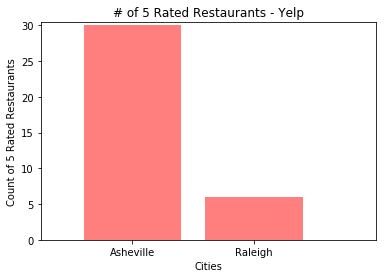

In [11]:
cities = ["Asheville", "Raleigh"]
five_rated = [30, 6]
x_axis = np.arange(len(five_rated))

# Create a bar chart based upon the above data
plt.bar(x_axis, five_rated, color='r', alpha=0.5, align="center")
 

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Asheville", "Raleigh"])


# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0)


# Set the limits of the y axis
plt.ylim(0, max(five_rated)+.4)


# Give the chart a title, x label, and y label
plt.title("# of 5 Rated Restaurants - Yelp")
plt.xlabel("Cities")
plt.ylabel("Count of 5 Rated Restaurants")

# Save an image of the chart and print it to the screen
plt.savefig("Images/five_rated.png")
plt.show()


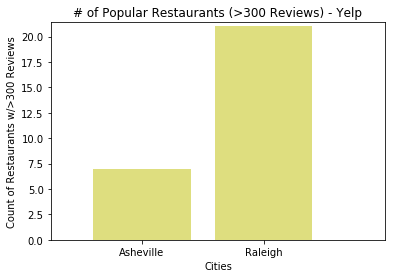

In [12]:
cities1 = ["Asheville", "Raleigh"]
popular_count = [7, 21]
x_axis = np.arange(len(popular_count))

# Create a bar chart based upon the above data
plt.bar(x_axis, popular_count, color='y', alpha=0.5, align="center")
 

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Asheville", "Raleigh"])


# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0)


# Set the limits of the y axis
plt.ylim(0, max(popular_count)+.4)


# Give the chart a title, x label, and y label
plt.title("# of Popular Restaurants (>300 Reviews) - Yelp")
plt.xlabel("Cities")
plt.ylabel("Count of Restaurants w/>300 Reviews")

# Save an image of the chart and print it to the screen
plt.savefig("Images/popular_count.png")
plt.show()

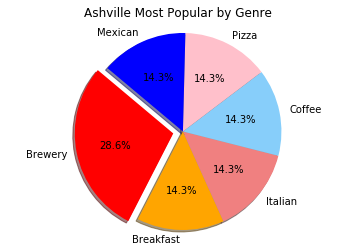

In [13]:
#Asheville most popular restaurant genres
plt.title("Ashville Most Popular by Genre")
          # Labels for the sections of our pie chart
labels = ["Brewery", "Breakfast","Italian","Coffee","Pizza","Mexican"]

# The values of each section of the pie chart
sizes = [2,1,1,1,1,1]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue", "pink", "blue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0, 0, 0, 0)
          
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
# Save an image of the chart and print it to the screen
plt.savefig("Images/ash_pie.png")
plt.show()

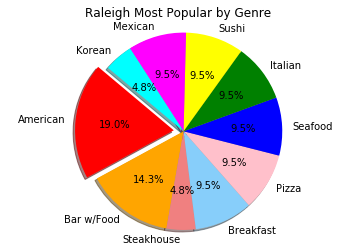

In [14]:
#Raleigh most popular restaurant genres
plt.title("Raleigh Most Popular by Genre")
# Labels for the sections of our pie chart
labels = ["American","Bar w/Food","Steakhouse", "Breakfast","Pizza","Seafood", "Italian", "Sushi", "Mexican","Korean"]

# The values of each section of the pie chart
sizes = [4,3,1,2,2,2,2,2,2,1]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue", "pink", "blue", "green", "yellow", "magenta", "cyan"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0, 0, 0, 0,0,0,0,0)
          
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
# Save an image of the chart and print it to the screen
plt.savefig("Images/raleigh_pie.png")
plt.show()